Question 1:  What is Simple Linear Regression?
- a statistical method for studying the linear relationship between two continuous quantitative variables, one independent variable (X) and one dependent variable (Y), by finding a straight "line of best fit" through the data points

Question 2: What are the key assumptions of Simple Linear Regression?
- Linearity (a linear relationship between variables)
- Independence (observations are independent of each other)
- Normality (residuals are normally distributed)

Question 3: What is heteroscedasticity, and why is it important to address in regression models?
- heteroscedasticity describes a situation where the spread of the error term changes across the range of an independent variable
- Heteroscedasticity leads to incorrect standard errors for the regression coefficients

Question 4: What is Multiple Linear Regression?
- a statistical method that predicts a dependent variable by understanding its linear relationship with two or more independent variables

Question 5: What is polynomial regression, and how does it differ from linear regression?
- Polynomial regression models non-linear relationships by fitting an nth-degree polynomial curve to the data, while linear regression fits a straight line to data that exhibits a linear relationship


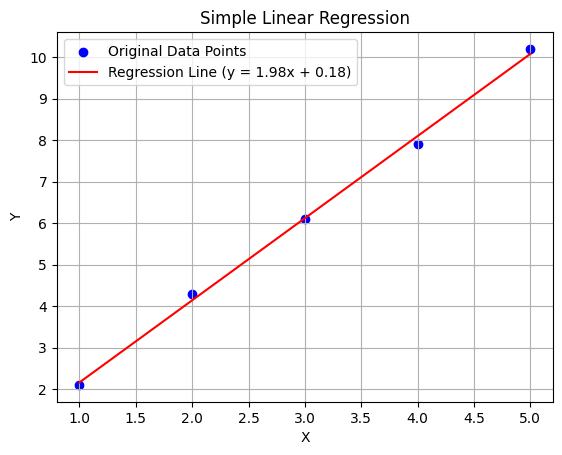

In [ ]:
#Question 6:  Implement a Python program to fit a Simple Linear Regression model to the following sample data: ● X = [1, 2, 3, 4, 5] ● Y = [2.1, 4.3, 6.1, 7.9, 10.2] Plot the regression line over the data points. (Include your Python code and output in the code box below.)
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit the linear regression model using polyfit (degree 1 for linear)
# This returns the coefficients [slope, intercept]
slope, intercept = np.polyfit(X, Y, 1)

# Generate predicted Y values based on the fitted line
Y_pred = slope * X + intercept

# Plot the original data points
plt.scatter(X, Y, color='blue', label='Original Data Points')

# Plot the regression line
plt.plot(X, Y_pred, color='red', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Question 7: Fit a Multiple Linear Regression model on this sample data: ● Area = [1200, 1500, 1800, 2000] ● Rooms = [2, 3, 3, 4] ● Price = [250000, 300000, 320000, 370000] Check for multicollinearity using VIF and report the results. (Include your Python code and output in the code box below.)
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

X = df[['Area', 'Rooms']]
y = df['Price']

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()
#print(model.summary())

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n🔎 Variance Inflation Factor (VIF):")
print(vif_data)



🔎 Variance Inflation Factor (VIF):
  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923


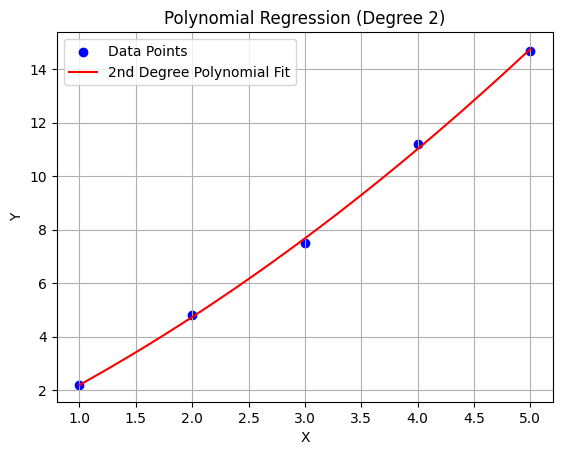

In [ ]:
#Question 8:  Implement polynomial regression on the following data: ● X = [1, 2, 3, 4, 5] 3 ● Y = [2.2, 4.8, 7.5, 11.2, 14.7] Fit a 2nd-degree polynomial and plot the resulting curve. (Include your Python code and output in the code box below.)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

X_fit = np.linspace(1, 5, 100).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
Y_fit = model.predict(X_fit_poly)

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X_fit, Y_fit, color='red', label='2nd Degree Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()


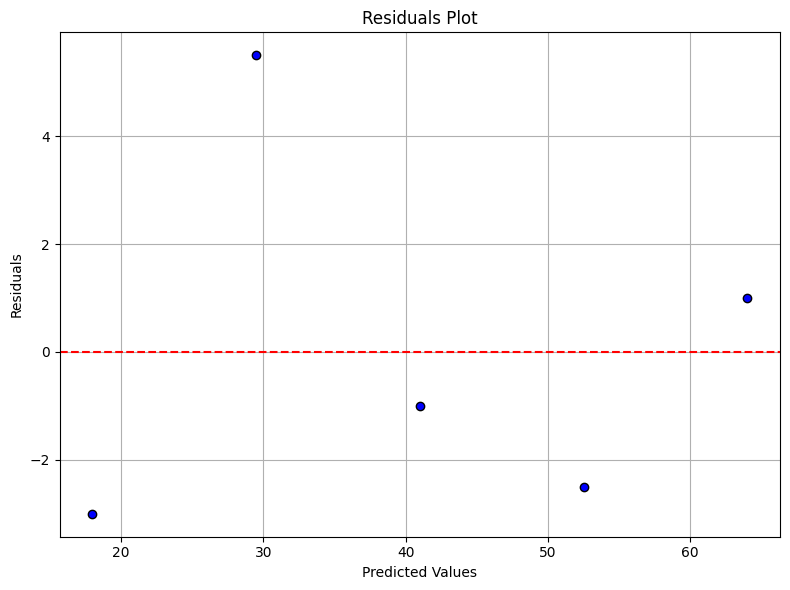

In [ ]:
#Question 9: Create a residuals plot for a regression model trained on this data: ● X = [10, 20, 30, 40, 50] ● Y = [15, 35, 40, 50, 65] Assess heteroscedasticity by examining the spread of residuals. (Include your Python code and output in the code box below.)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

residuals = Y - Y_pred

plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, color='blue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
- Plot residuals vs predicted values
- Check for high correlations among predictors.